### In this section, 
we load the CIFAR-10 dataset. x_train and y_train are used for training, while x_test and y_test are used for testing.

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

We specify a percentage to use 10% of the dataset.

In [2]:
# Define the fraction of the dataset to be used (10%)
subset_fraction = 0.1

We minimize the training and test data. We use the subset_fraction percentage to get only a fraction of the dataset.

In [3]:
# Reduce the training data
train_subset_size = int(len(x_train) * subset_fraction)
x_train_subset = x_train[:train_subset_size]
y_train_subset = y_train[:train_subset_size]

# Reduce the test data
test_subset_size = int(len(x_test) * subset_fraction)
x_test_subset = x_test[:test_subset_size]
y_test_subset = y_test[:test_subset_size]


We divide by 255 to normalize the data, that is, to ensure that the pixel values ​​are between 0 and 1.

In [4]:
# Normalize the data
x_train_subset, x_test_subset = x_train_subset / 255.0, x_test_subset / 255.0


A second-order tensor is created for each category by one-hot coding of labels.

In [5]:
# One-hot encode the labels
y_train_subset = to_categorical(y_train_subset, num_classes=10)
y_test_subset = to_categorical(y_test_subset, num_classes=10)


We create a neural network model. 
There are convolution layers (Conv2D), max-pooling layers (MaxPooling2D), flatten layer and fully connected layers (Dense).

In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the model: we use adam as the optimizer, categorical_crossentropy as the loss function and accuracy as the metric.

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model training: during 10 epochs and 64 examples are used in each batch.

In [13]:
# Train the model
print("Training the model...")
history = model.fit(x_train_subset, y_train_subset, epochs=10, batch_size=64, verbose=2)


Training the model...
Epoch 1/10
79/79 - 1s - 18ms/step - accuracy: 0.7068 - loss: 0.8484
Epoch 2/10
79/79 - 1s - 18ms/step - accuracy: 0.7366 - loss: 0.7602
Epoch 3/10
79/79 - 1s - 17ms/step - accuracy: 0.7608 - loss: 0.7107
Epoch 4/10
79/79 - 1s - 17ms/step - accuracy: 0.7900 - loss: 0.6376
Epoch 5/10
79/79 - 1s - 17ms/step - accuracy: 0.7996 - loss: 0.5953
Epoch 6/10
79/79 - 1s - 17ms/step - accuracy: 0.8240 - loss: 0.5326
Epoch 7/10
79/79 - 1s - 17ms/step - accuracy: 0.8454 - loss: 0.4670
Epoch 8/10
79/79 - 1s - 16ms/step - accuracy: 0.8808 - loss: 0.3957
Epoch 9/10
79/79 - 1s - 17ms/step - accuracy: 0.8852 - loss: 0.3652
Epoch 10/10
79/79 - 1s - 17ms/step - accuracy: 0.9086 - loss: 0.3088


Evaluating the model on the test set and printing the test accuracy (test_acc).

In [15]:
# Evaluate the model
print("Evaluating the model on test data...")
test_loss, test_acc = model.evaluate(x_test_subset, y_test_subset, verbose=2)

# Print test accuracy
print('\nTest accuracy:', test_acc)



Evaluating the model on test data...
32/32 - 0s - 7ms/step - accuracy: 0.5630 - loss: 1.6658

Test accuracy: 0.5630000233650208


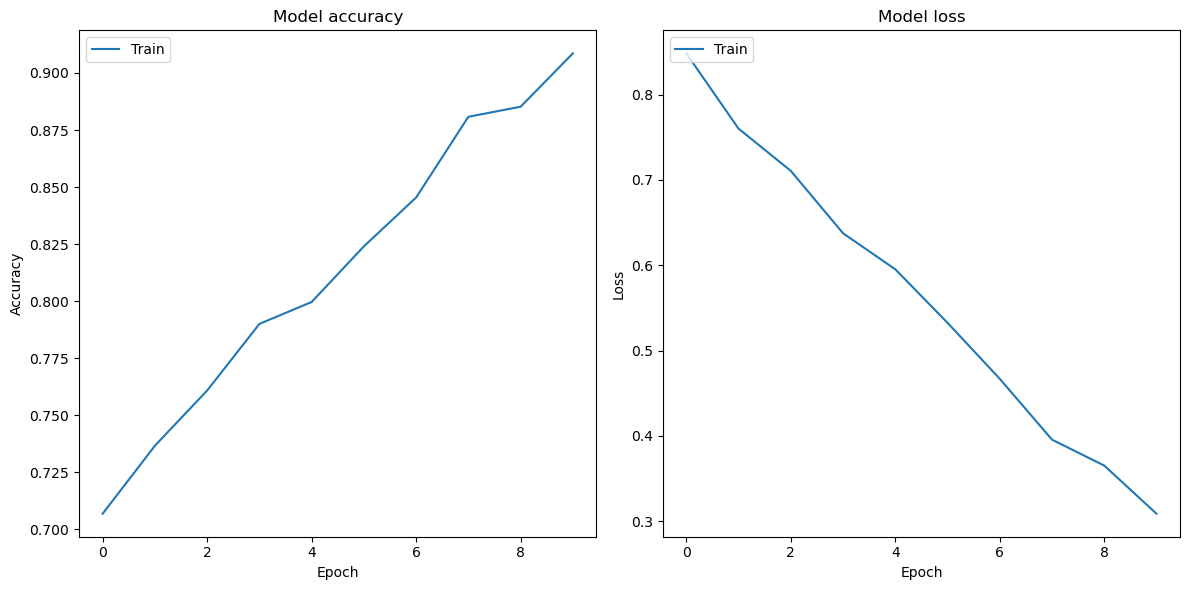

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


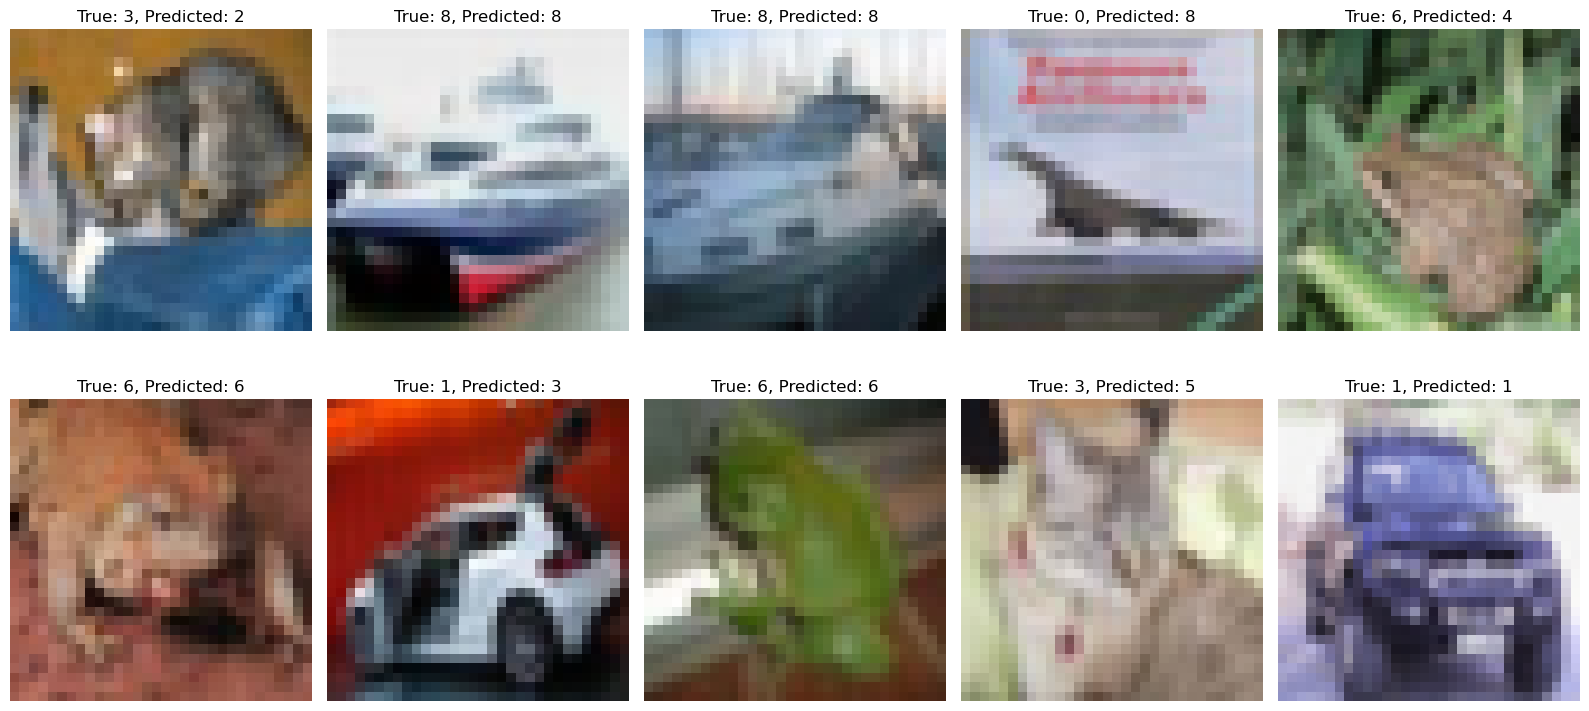

In [16]:
# Plotting training accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()

# Making predictions
predictions = model.predict(x_test_subset)

# Plotting example predictions
plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_subset[i])
    plt.title(f"True: {np.argmax(y_test_subset[i])}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()